In [1]:
# python resample.py $IMAGE_TO_RESAMPLE $REFERENCE_IMAGE
#!jupyter nbconvert run_perms-2023-03-07.ipynb --to python

In [2]:
import nibabel as nib

from nilearn.input_data import NiftiMasker , MultiNiftiMasker, NiftiLabelsMasker
import nilearn as nil
import numpy as np 
import os
import os.path
import scipy.io
import nibabel as nib
from nilearn.input_data import NiftiMasker
from nilearn.masking import compute_epi_mask
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import SGDClassifier
from copy import deepcopy
import warnings
import sys  
import random
# import logging

import deepdish as dd
import numpy as np

import brainiak.eventseg.event
import nibabel as nib
from nilearn.input_data import NiftiMasker

import scipy.io
from scipy import stats
from scipy.stats import norm, zscore, pearsonr
from scipy.signal import gaussian, convolve
from sklearn import decomposition
from sklearn.model_selection import LeaveOneOut, KFold

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import seaborn as sns 


sns.set(style = 'white', context='talk', font_scale=1, rc={"lines.linewidth": 2})

if not sys.warnoptions:
    warnings.simplefilter("ignore")

"""
from utils import sherlock_h5_data

if not os.path.exists(sherlock_h5_data):
    os.makedirs(sherlock_h5_data)
    print('Make dir: ', sherlock_h5_data)
else: 
    print('Data path exists')
    
from utils import sherlock_dir
"""

random.seed(10)

from brainiak import image, io
from scipy.stats import stats
import nibabel as nib
import numpy as np
from matplotlib import pyplot as plt
from brainiak import image, io
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import LeavePGroupsOut
from nilearn.input_data import NiftiMasker
import pandas as pd
# Import machine learning libraries
from nilearn.input_data import NiftiMasker
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, f_classif, SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import sem
from copy import deepcopy
from sklearn.metrics import roc_auc_score
import statistics
# Visualize it as an ROI
from nilearn.plotting import plot_roi
#plot_roi(x)
from nilearn.image import concat_imgs, resample_img, mean_img
from nilearn.plotting import view_img
from nilearn import datasets, plotting
from nilearn.input_data import NiftiSpheresMasker

from nilearn.glm.first_level import FirstLevelModel
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.image import concat_imgs, resample_img, mean_img,index_img
from nilearn import image
from nilearn import masking
from nilearn.plotting import view_img
from nilearn.image import resample_to_img
from scipy.spatial.distance import squareform
# Visualize it as an ROI
from nilearn.plotting import plot_roi
import statsmodels.stats.multitest as st
from nilearn import connectome
from nilearn import image
from scipy.spatial.distance import squareform
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.model_selection import LeavePGroupsOut
from sklearn.model_selection import LeaveOneGroupOut
from nilearn import input_data
from nilearn.plotting import plot_glass_brain
from nilearn.masking import apply_mask
import random

In [3]:
def calc_boot(acc_folds, n_boots=10000):
    n_folds = len(acc_folds)

    boots = []
    for b in np.arange(n_boots):
        boot = np.random.choice(acc_folds, n_folds, replace=True)
        mean_boot = np.mean(boot)
        boots.append(mean_boot)
    return boots

# Calculate p-value

In [4]:
# directory # 
# Top Directory
top_dir = '/jukebox/graziano/coolCatIsaac/ATM/code/analysis/MVPA/final_9-1-23' ###**** CHANGE ME
act_dir = top_dir + '/activations'
acc_dir = top_dir + '/classification'
perm_dir = top_dir +'/permutations'
perm_results = perm_dir + '/perm_results'

date = '2023-07-17'
norm = 'space'
cond = 'SM_OM'
roi = 'RH_Cont_Par_2'#'LH_Default_PFC_11'
win = 'win5'

# perms 
perm_roc_name = f'perm_roc_{norm}norm_{date}_{cond}_{roi}_{win}'

#sample accuracy
acc_dict_name = f'classification_between-cond_{analname}_svm_{date}' # CHANGE ME
acc = np.load(os.path.join(acc_dir, '%s.npy') %(acc_dict_name ), allow_pickle=True).item()
anal_name = f'{cond}_{roi}_{win}'

NameError: name 'analname' is not defined

In [ ]:
#load PERM dictionary
perms = np.load(os.path.join(perm_results, '%s.npy') %(perm_roc_name), allow_pickle=True)
# load sample acc
true_acc = np.round(acc[anal_name]["roc"],4)
print(f'True accuracy is: {true_acc}')

In [251]:
len(perms)

9985

### boosstrap

In [252]:
acc_folds = acc[anal_name]['OutRoc_array']
boots = calc_boot(acc_folds)

In [253]:
print(f'upper: {np.round(np.percentile(boots, 97.5), 4)}\n' 
      f'med: {np.round(np.percentile(boots, 50), 4)}\n'
      f'lower: {np.round(np.percentile(boots, 2.5), 4)}\n'
     f'test stat: {np.round(np.mean(acc_folds), 4)}')

upper: 0.5955
med: 0.5612
lower: 0.527
test stat: 0.5612


## visualize perms

mean = 0.50, std = 0.02


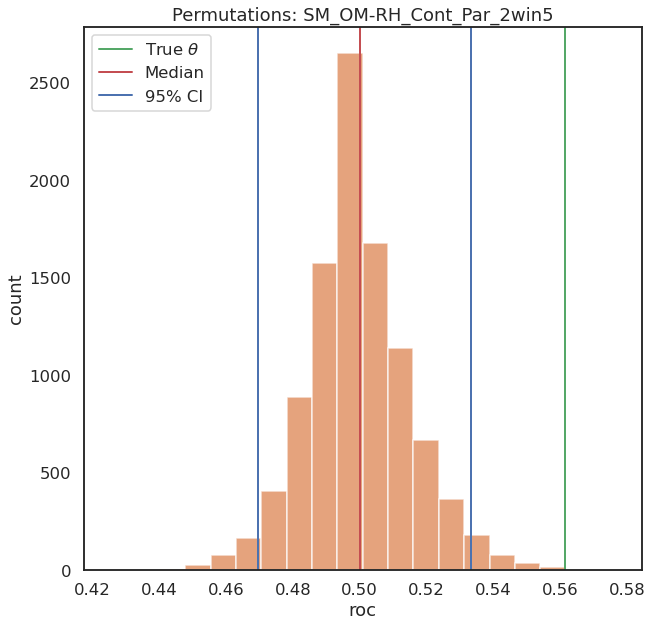

In [254]:
print(f"mean = {np.mean(perms):.2f}, std = {np.std(perms):.2f}")

fig, ax = plt.subplots(figsize = (10,10))
ax.hist(perms, bins=20, facecolor='C1', alpha=0.75)
ax.axvline(true_acc, c='g', label=r'True $\theta$')
ax.axvline(np.percentile(perms, 50), color='r', label='Median')
ax.axvline(np.percentile(perms, 2.5), color='b', label='95% CI')
ax.axvline(np.percentile(perms, 97.5), color='b')
ax.legend()
ax.set(
    title=f'Permutations: {cond}-{roi}{win}',
    xlabel='roc',
    ylabel='count',
    #xlim=[1.0, 1.5]
)
#sns.despine()
plt.show()

In [255]:
print(f'upper: {np.round(np.percentile(perms, 97.5), 4)}\n' 
      f'med: {np.round(np.percentile(perms, 50), 4)}\n' 
      f'lower: {np.round(np.percentile(perms, 2.5), 4)}\n'
     f'max: {np.round(np.max(perms), 4)}\n'
      f'count greater than true: {len(np.where(true_acc < perms)[0])}\n'
      f'true: {true_acc}\n'
     f'pval: {np.round(len(np.where(true_acc < perms)[0]) / len(perms), 4)}')

upper: 0.5334
med: 0.5
lower: 0.4697
max: 0.5767
count greater than true: 5
true: 0.5612
pval: 0.0005


# cross perms

In [5]:
# directory # 
# Top Directory
top_dir = '/jukebox/graziano/coolCatIsaac/ATM/code/analysis/MVPA/final_9-1-23' 
act_dir = top_dir + '/activations'
acc_dir = top_dir + '/classification'
perm_dir = top_dir +'/permutations'
perm_results = perm_dir + '/perm_results'

date = '2023-07-17'

###**** CHANGE ME
cond_set1 = 'SM_SC' #'OM_OC'
cond_set2 = 'OM_OC'#'SM_SC'
title = cond_set1 + '-' + cond_set2
roi = 'LH_Default_PFC_11' # RH_Default_Par_3
win = 'win4'
#sample acc
anal = f'{cond_set1}_{roi}_{win}-{cond_set2}_{roi}_{win}'

# perms 
perm_roc_name = f'cross_cond_perm_spacenorm_2023-07-17_{cond_set1}_{roi}_{win}-{cond_set2}_{roi}_{win}'

#load PERM dictionary
perms = np.load(os.path.join(perm_results, '%s.npy') %(perm_roc_name), allow_pickle=True)

In [6]:
len(perms)

9951

In [7]:
# load sample accuracy
acc_dict_name = f'cross_cond_spacenorm_svm_{date}'
#acc_dict_name = f'CV13_cross_cond_spacenorm_svm_{date}'

#load activation dictionary
acc = np.load(os.path.join(acc_dir, '%s.npy') %(acc_dict_name ), allow_pickle=True).item()

true_acc = np.round(acc[anal]['roc'],4)
print(anal)
print(f'true acc is : {true_acc}')

SM_SC_LH_Default_PFC_11_win4-OM_OC_LH_Default_PFC_11_win4
true acc is : 0.5407


## visualize perms

mean = 0.50, std = 0.01


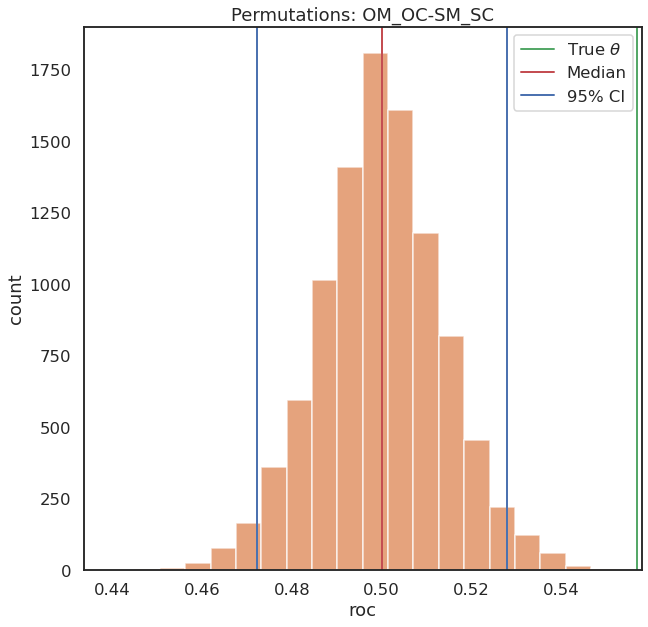

In [264]:
print(f"mean = {np.mean(perms):.2f}, std = {np.std(perms):.2f}")

fig, ax = plt.subplots(figsize = (10,10))
ax.hist(perms, bins=20, facecolor='C1', alpha=0.75)
ax.axvline(true_acc, c='g', label=r'True $\theta$')
ax.axvline(np.percentile(perms, 50), color='r', label='Median')
ax.axvline(np.percentile(perms, 2.5), color='b', label='95% CI')
ax.axvline(np.percentile(perms, 97.5), color='b')
ax.legend()
ax.set(
    title=f'Permutations: {title}',
    xlabel='roc',
    ylabel='count',
    #xlim=[1.0, 1.5]
)
#sns.despine()
plt.show()

In [265]:
print(f'upper: {np.round(np.percentile(perms, 97.5), 4)}\n' 
      f'med: {np.round(np.percentile(perms, 50), 4)}\n' 
      f'lower: {np.round(np.percentile(perms, 2.5), 4)}\n'
     f'max: {np.round(np.max(perms), 4)}\n'
      f'count greater than true: {len(np.where(true_acc < perms)[0])}\n'
     f'pval: {np.round(len(np.where(true_acc < perms)[0]) / len(perms), 4)}')

upper: 0.528
med: 0.5
lower: 0.4723
max: 0.5524
count greater than true: 0
pval: 0.0


### booostrap

In [148]:
acc_folds = acc[anal]['RocAcc_array']
boots = calc_boot(acc_folds)
print(f'upper: {np.round(np.percentile(boots, 97.5), 4)}\n' 
      f'med: {np.round(np.percentile(boots, 50), 4)}\n'
      f'lower: {np.round(np.percentile(boots, 2.5), 4)}\n'
     f'test stat: {np.round(np.mean(acc_folds), 4)}')

upper: 0.5495
med: 0.5407
lower: 0.5328
test stat: 0.5407
